In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Preprocessing

In this section I have done some data processing by extracting holidays from the holiday_dates files and mapping them to the dates in the ecommerce file

In [ ]:
ecommerce = pd.read_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/ecommerce_data.csv").drop('Unnamed: 0',axis=1)
holiday = pd.read_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/us_holiday_dates.csv")

In [ ]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10


In [ ]:
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


Since we are only given purchases from the year 2010 - 2011 I will select only those holiday occuring in 2010 and 2011

In [ ]:
holiday = holiday.loc[(holiday['Year'] <= 2011) & (holiday['Year'] >= 2010)]

In [ ]:
ecommerce.shape , holiday.shape

((81601, 9), (38, 6))

Extracting the month, year and day from the purchase df

In [ ]:
import datetime
def get_date_month_year(x):
  datee = datetime.datetime.strptime(x, "%Y-%m-%d")
  return [datee.year,datee.month,datee.day,datee.strftime('%A')]
  return 0
dates = []
months = []
years = []
weekdays = []

for x in ecommerce['Date']:
  got = get_date_month_year(x)
  years.append(got[0])
  months.append(got[1])
  dates.append(got[2])
  weekdays.append(got[3])

ecommerce['WeekDay'] = weekdays
ecommerce['Month'] = months
ecommerce['Year'] = years
ecommerce['Day'] = dates

In [ ]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,WeekDay,Month,Year,Day
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,Friday,11,2011,4
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,Monday,10,2011,10
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9,Tuesday,9,2011,13
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13,Friday,1,2011,14
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10,Thursday,9,2011,8


In [ ]:
hol_group = holiday.groupby("Holiday")
hol_group.first()

,Date,WeekDay,Month,Day,Year
Holiday,,,,,
4th of July,2010-07-04,Sunday,7,4,2010
Christmas Day,2010-12-25,Saturday,12,25,2010
Christmas Eve,2010-12-24,Friday,12,24,2010
Columbus Day,2011-10-10,Monday,10,10,2011
Eastern Easter,2010-04-04,Sunday,4,4,2010
Juneteenth,2010-06-19,Saturday,6,19,2010
Labor Day,2011-09-05,Monday,9,5,2011
Labor Day Weekend,2011-09-03,Saturday,9,3,2011
"Martin Luther King, Jr. Day",2011-01-17,Monday,1,17,2011


We can see that some holidays have been unnecessarily divided Eg. New Year's Day and New Year's Eve lets group them together

In [ ]:
def get_holiday(x):
  if "Christmas" in x:
    return "Christmas"
  elif "Easter" in x:
    return "Easter"
  elif "Labor" in x:
    return "Labor Day"
  elif "New" in x:
    return "New Year"
  elif "Thanksgiving" in x:
    return "Thanksgiving"
  return x

In [ ]:
get_holiday("New Year's")

'New Year'

In [ ]:
holiday["Holiday_name"] = [get_holiday(x) for x in holiday['Holiday']]
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year,Holiday_name
6,2010-07-04,4th of July,Sunday,7,4,2010,4th of July
7,2011-07-04,4th of July,Monday,7,4,2011,4th of July
24,2010-12-25,Christmas Day,Saturday,12,25,2010,Christmas
25,2011-12-25,Christmas Day,Sunday,12,25,2011,Christmas
42,2010-12-24,Christmas Eve,Friday,12,24,2010,Christmas


In [ ]:
holiday.groupby("Holiday_name").mean()

<ipython-input-14-cf4aaa7a751b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  holiday.groupby("Holiday_name").mean()


,Month,Day,Year
Holiday_name,,,
4th of July,7.0,4.0,2010.5
Christmas,12.0,24.5,2010.5
Columbus Day,10.0,10.5,2010.5
Easter,4.0,14.0,2010.5
Juneteenth,6.0,19.0,2010.5
Labor Day,9.0,4.5,2010.5
"Martin Luther King, Jr. Day",1.0,17.5,2010.5
Memorial Day,5.0,30.5,2010.5
New Year,6.5,16.0,2010.5


**Since people start shopping for festivals some weeks prior I have divided Each festival into date ranges**

In [ ]:
holiday_dict = {
    "Holiday" : ['4th of July', 'Christmas', 'Columbus Day', 'Easter', 'Juneteenth',
       'Labor Day', 'Martin Luther King, Jr. Day', 'Memorial Day',
       'New Year', 'Thanksgiving', 'Valentine’s Day', 'Veterans Day',
       "Washington's Birthday"],

    "Starting Date":["2000-06-27","2000-12-01","2000-10-03","2000-04-01","2000-06-13","2000-09-03","2000-01-14","2000-05-25","2000-12-26",
                     "2000-11-20","2000-02-07","2000-11-05","2000-02-15"],
    "Ending Date":["2000-07-04","2000-12-25","2000-10-10","2000-04-29","2000-06-19","2000-09-07","2000-01-18","2000-05-28","2001-01-05",
                     "2000-11-24","2000-02-14","2000-11-11","2000-02-17"]          
}
holiday_range = pd.DataFrame(holiday_dict)
holiday_range

,Holiday,Starting Date,Ending Date
0,4th of July,2000-06-27,2000-07-04
1,Christmas,2000-12-01,2000-12-25
2,Columbus Day,2000-10-03,2000-10-10
3,Easter,2000-04-01,2000-04-29
4,Juneteenth,2000-06-13,2000-06-19
5,Labor Day,2000-09-03,2000-09-07
6,"Martin Luther King, Jr. Day",2000-01-14,2000-01-18
7,Memorial Day,2000-05-25,2000-05-28
8,New Year,2000-12-26,2001-01-05
9,Thanksgiving,2000-11-20,2000-11-24


In [ ]:
def check_between(a,b,c):
  b = "2000-" + b[5:]
  d1 = datetime.datetime.strptime(a, "%Y-%m-%d")
  d2 = datetime.datetime.strptime(b, "%Y-%m-%d")
  d3 = datetime.datetime.strptime(c, "%Y-%m-%d")
  return d1<=d2<=d3

def check_get_holiday(x):
  for i in range(0,len(holiday_range)):
    start = holiday_range.iloc[i]['Starting Date']
    end = holiday_range.iloc[i]['Ending Date']
    hol = holiday_range.iloc[i]['Holiday']
    if(check_between(start,x,end)):
      return hol
  return "No Holiday " + x[3:4]


In [ ]:
# ecommerce['Holiday'] = [check_get_holiday(x) for x in ecommerce["Date"]]
# ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,WeekDay,Month,Year,Day,Holiday
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,Friday,11,2011,4,No Holiday 1
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,Monday,10,2011,10,Columbus Day
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9,Tuesday,9,2011,13,No Holiday 1
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13,Friday,1,2011,14,"Martin Luther King, Jr. Day"
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10,Thursday,9,2011,8,No Holiday 1


In [ ]:
# ecommerce.to_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/ecommerce_holiday_data.csv",index=False)

In [ ]:
ecommerce = pd.read_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/ecommerce_holiday_data.csv")
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,WeekDay,Month,Year,Day,Holiday
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,Friday,11,2011,4,No Holiday 1
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,Monday,10,2011,10,Columbus Day
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9,Tuesday,9,2011,13,No Holiday 1
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13,Friday,1,2011,14,"Martin Luther King, Jr. Day"
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10,Thursday,9,2011,8,No Holiday 1


In [ ]:
ecommerce["Holiday"].unique()

array(['No Holiday 1', 'Columbus Day', 'Martin Luther King, Jr. Day',
       'Labor Day', 'Christmas', 'Easter', "Washington's Birthday",
       'Thanksgiving', 'Valentine’s Day', 'Veterans Day', '4th of July',
       'Juneteenth', 'Memorial Day'], dtype=object)

In [ ]:
ecommerce["Year"].unique()

array([2011, 2010])

In [ ]:
ecommerce["Country"].unique()

array(['United Kingdom', 'France', 'Germany', 'Portugal', 'Italy', 'EIRE',
       'Australia', 'Cyprus', 'Netherlands', 'Switzerland', 'Japan',
       'Denmark', 'Channel Islands', 'Finland', 'Spain', 'Belgium',
       'Sweden', 'USA', 'Austria', 'Iceland', 'Brazil', 'Norway',
       'Singapore', 'Israel', 'RSA', 'Poland', 'Lithuania', 'Greece',
       'Canada', 'Malta', 'Unspecified', 'Bahrain',
       'United Arab Emirates', 'European Community', 'Saudi Arabia',
       'Czech Republic', 'Lebanon'], dtype=object)

In [ ]:
ecommerce['PriceSpent'] = ecommerce['Quantity'] * ecommerce["UnitPrice"]
ecommerce.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,WeekDay,Month,Year,Day,Holiday,PriceSpent
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,Friday,11,2011,4,No Holiday 1,3.25
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,Monday,10,2011,10,Columbus Day,89.40


In [ ]:
ecommerce.drop(["Quantity","UnitPrice","CustomerID","InvoiceNo","StockCode","Date","Hour"],axis=1,inplace=True)

###EDA

In [ ]:
df = ecommerce.copy()
df.head(2)

,Description,Country,WeekDay,Month,Year,Day,Holiday,PriceSpent
0,CARDHOLDER GINGHAM CHRISTMAS TREE,United Kingdom,Friday,11,2011,4,No Holiday 1,3.25
1,WALL ART CLASSIC PUDDINGS,United Kingdom,Monday,10,2011,10,Columbus Day,89.40


Lets see which country shops the most

In [ ]:
df.shape

(81601, 8)

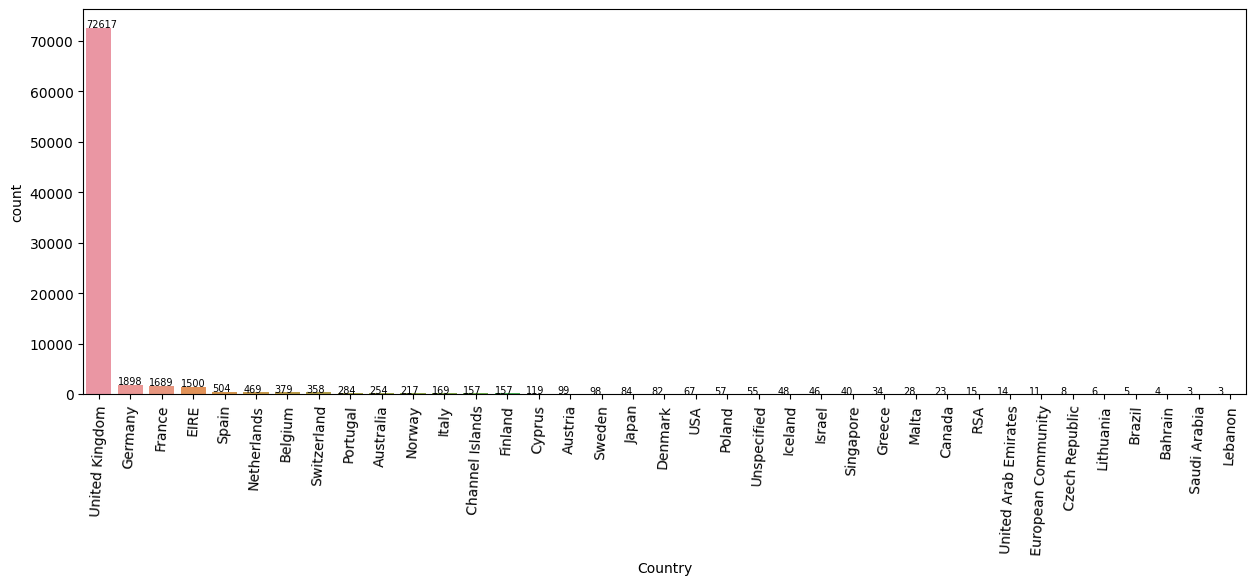

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['Country'],order = df['Country'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.08),fontsize=7)
plt.xticks(rotation=87)
plt.show()

Most purchases were from the united Kingdom

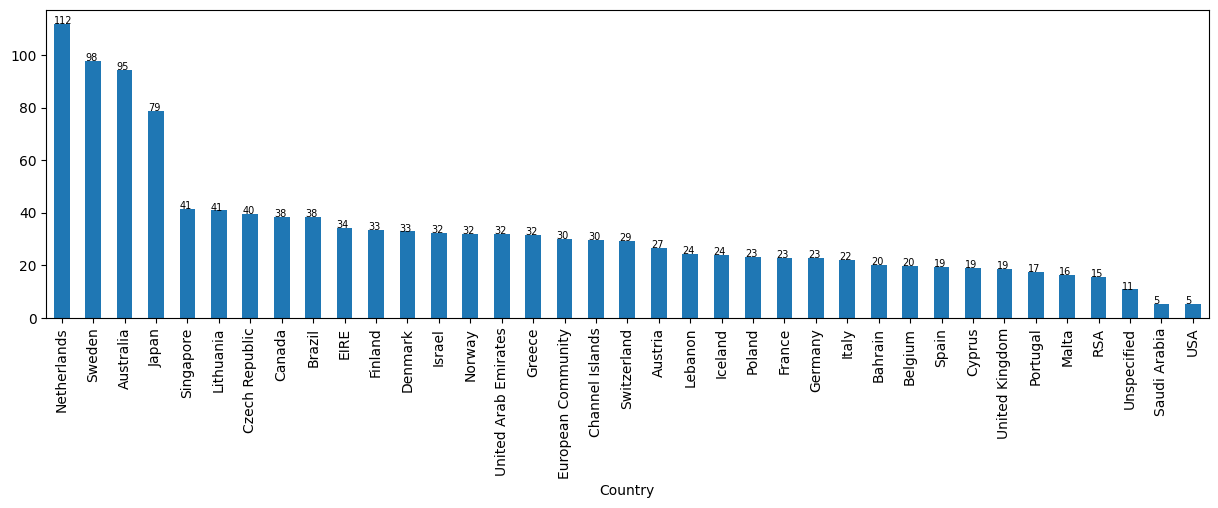

In [ ]:
plt.figure(figsize=(15,4))
ax = df.groupby("Country")["PriceSpent"].mean().sort_values(ascending=False).plot.bar()
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.08),fontsize=7)

Highest Average Purchase was made by Netherlands

Lets See which country spends the most during christmas

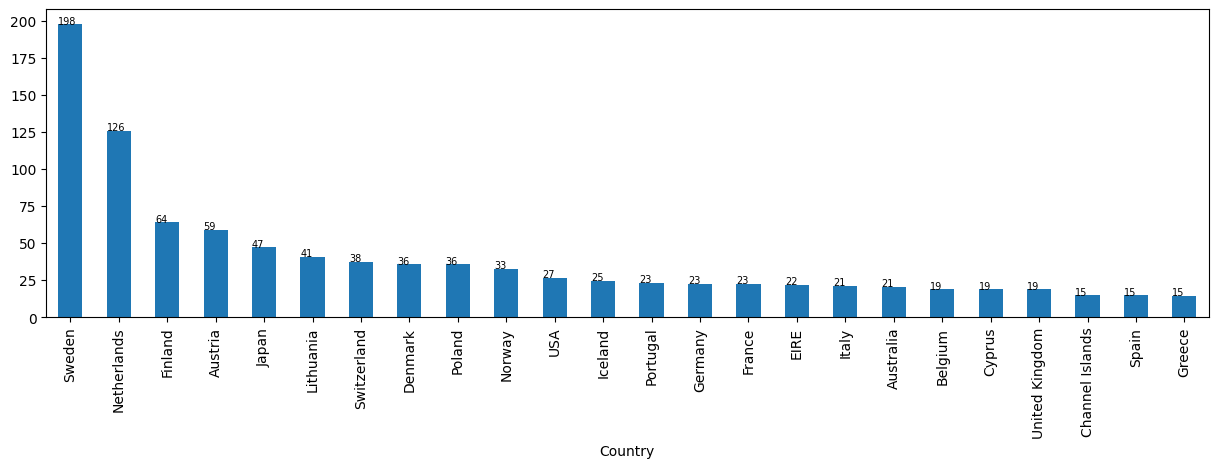

In [ ]:
plt.figure(figsize=(15,4))
ax = df[df['Holiday'] == 'Christmas'].groupby("Country")["PriceSpent"].mean().sort_values(ascending=False).plot.bar()
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.08),fontsize=7)

Lets see which during which festival do people shop the most

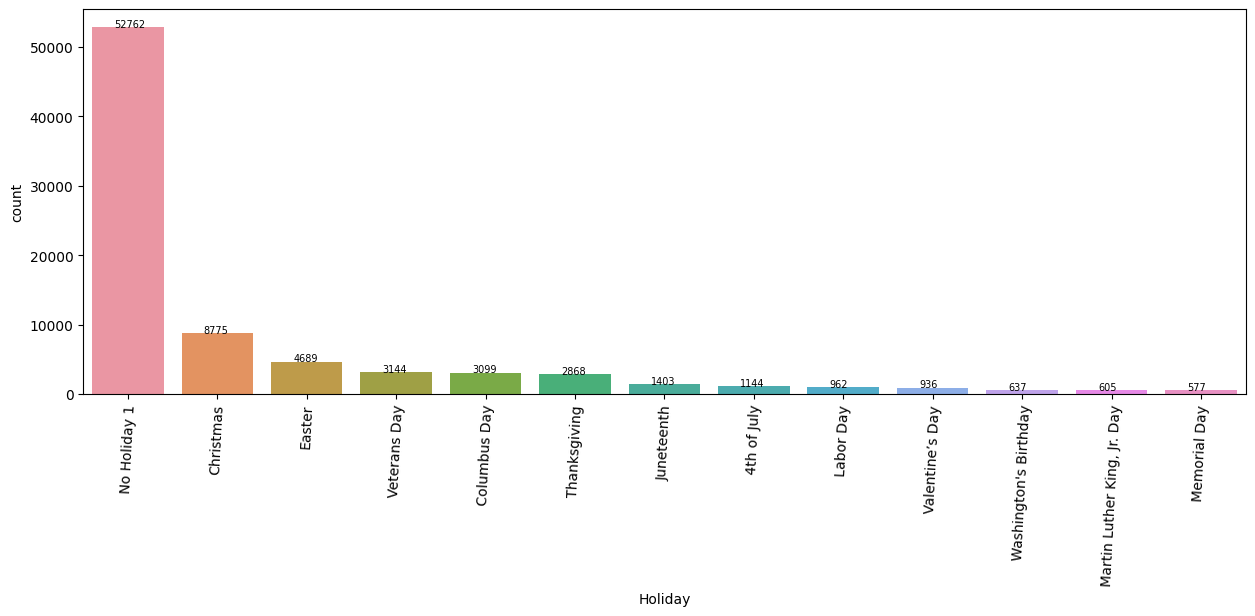

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['Holiday'],order = df['Holiday'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.08),fontsize=7)
plt.xticks(rotation=87)
plt.show()

We can see that most purchases were made during the christmas festival

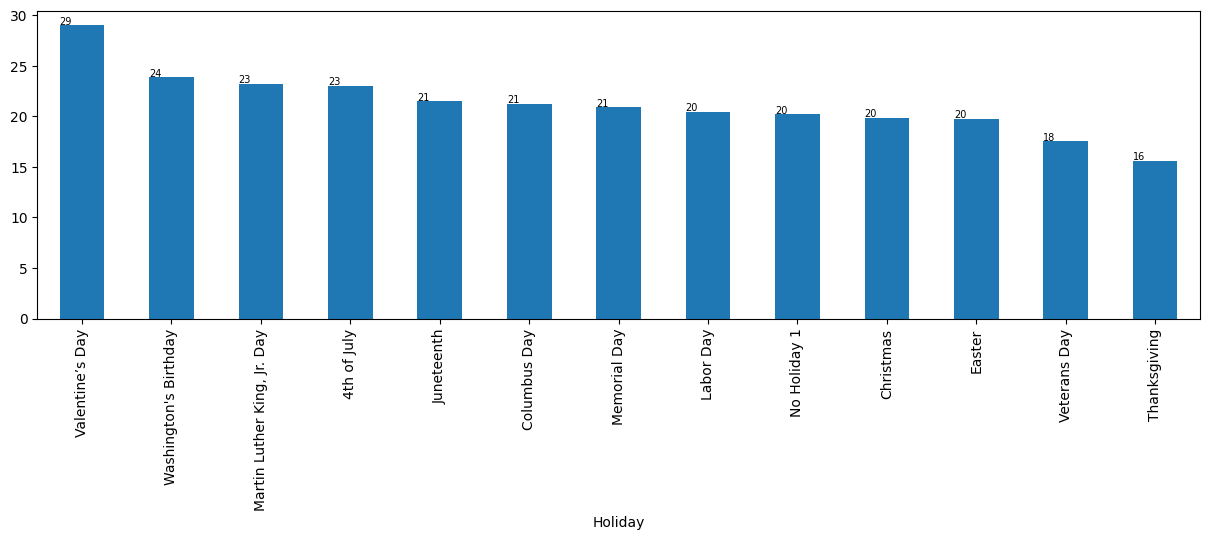

In [ ]:
plt.figure(figsize=(15,4))
ax = df.groupby("Holiday")["PriceSpent"].mean().sort_values(ascending=False).plot.bar()
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.08),fontsize=7)

In [ ]:
df['Holiday'].unique()

array(['No Holiday 1', 'Columbus Day', 'Martin Luther King, Jr. Day',
       'Labor Day', 'Christmas', 'Easter', "Washington's Birthday",
       'Thanksgiving', 'Valentine’s Day', 'Veterans Day', '4th of July',
       'Juneteenth', 'Memorial Day'], dtype=object)

We can see that dispite having less number of purchases average money spent is more during the valentine's week. By encouraging couples to buy more gifts through marketing we can get more profit.

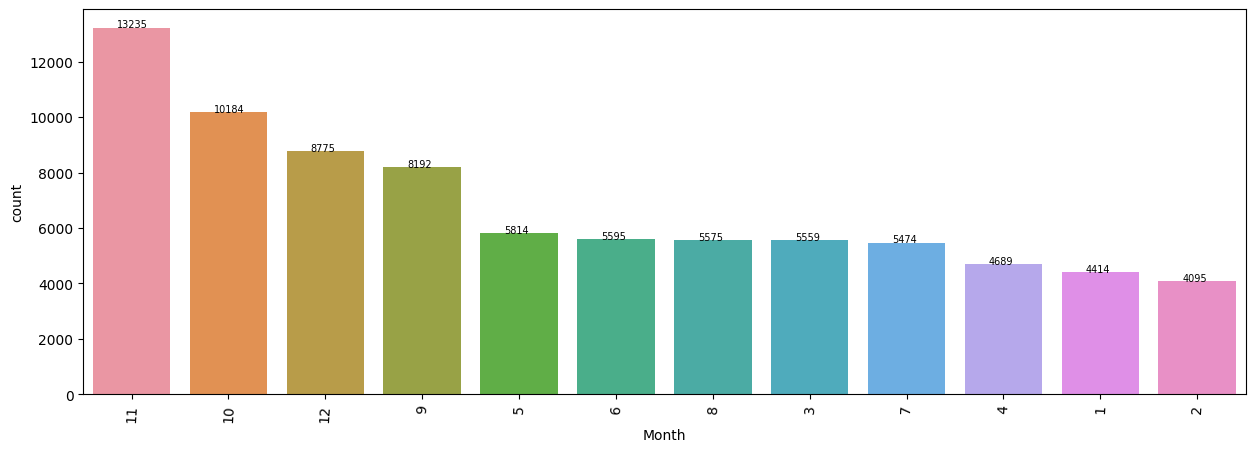

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['Month'],order = df['Month'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.08),fontsize=7)
plt.xticks(rotation=87)
plt.show()

Most purchases are made during november

Extending the christmas season to november will increase the number of purchases 

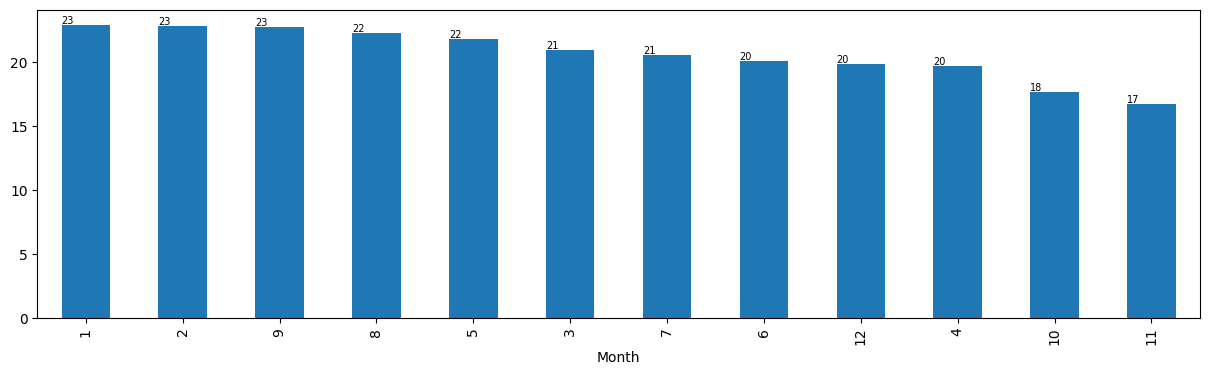

In [ ]:
plt.figure(figsize=(15,4))
ax = df.groupby("Month")["PriceSpent"].mean().sort_values(ascending=False).plot.bar()
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.08),fontsize=7)

Average purchase is highest during the new year therefore number of purchases during january should be increased. This can be done by increasing the new years season

Finding out most sold Items

In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

items_list = df['Description']

for x in df['Holiday'].unique():
  items = df[df['Holiday'] == x]["Description"]
  items_list = intersection(items_list,items)
items_list

['ASSORTED COLOUR BIRD ORNAMENT',
 'JUMBO STORAGE BAG SUKI',
 'LUNCH BAG SPACEBOY DESIGN ',
 'RED RETROSPOT CHARLOTTE BAG',
 'JAM MAKING SET WITH JARS',
 'JUMBO BAG SPACEBOY DESIGN',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'HEART OF WICKER SMALL',
 'WOODLAND CHARLOTTE BAG',
 'CREAM HEART CARD HOLDER',
 'RETROSPOT TEA SET CERAMIC 11 PC ',
 'ALARM CLOCK BAKELIKE PINK',
 'ROUND SNACK BOXES SET OF4 WOODLAND ',
 'SET/5 RED RETROSPOT LID GLASS BOWLS',
 'RED KITCHEN SCALES',
 'SPACEBOY LUNCH BOX ',
 'LUNCH BAG CARS BLUE',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'REGENCY CAKESTAND 3 TIER',
 'NATURAL SLATE HEART CHALKBOARD ',
 'GIN + TONIC DIET METAL SIGN',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'POSTAGE',
 'JUMBO BAG WOODLAND ANIMALS',
 'LUNCH BAG RED RETROSPOT']

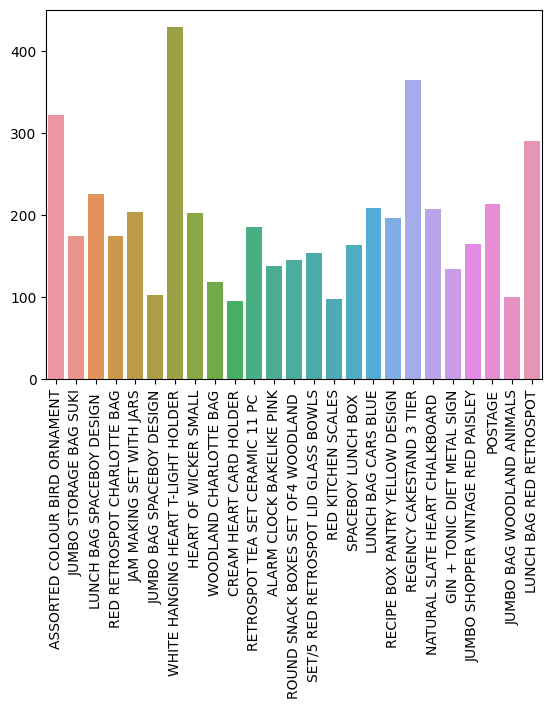

In [ ]:
sns.barplot(x = items_list,y=[len(df[df['Description'] == x]) for x in items_list])
plt.xticks(rotation=90)
plt.show()

Since these items are in most demand they should be marketed to a larger audience

### FINAL CONCLUSIONS

###**BASED ON THE EDA PERFORMED ABOVE WE CAN CONCLUDE THAT :**



### 1.   We can divide months into:
    

*   **High Performing Months** : Nov, Oct, Dec, Sept
*   **Medium Performing Months** : Mar, May, June, July, Aug
*   **Low Performing Months** : Jan, Feb, Apr

We can see that starting months don't perform too well. We can provide discounts and sales during this period to increase the sales.




### 2.   We can divide holidays into:
    

*   **High Performing Holidays** : Christmas, Easter
*   **Medium Performing Holidays** : Veterans Day, Columbus, Thanksgiving,Juneteenth
*   **Low Performing Holidays** : 4th of july, Labor Day, Valentines's Day, Washington's Birthday, Matin Luther day jr, Memorial Day

We can see that long running holidays like christmas/easter bring in more sales. Therefore marketing should focus on smaller holidays like 4th of july, Valentine's day, etc.


### 3. Skewness
* **Holidays** : Holidays contain skewness most purchases are made during christmas if holidays are considered

* **Country** : Most purchases are made from United Kingdom



